In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
datasets = ['sift1m', 'gist1m', 'deep1m']

indices = ['hnsw', 'vamana', 'hcnng', 'nsg']

colors = ['tomato', 'deepskyblue', 'forestgreen', 'PeachPuff']

part4indices = [2, 2, 2, 2]

knn = 10

num_datasets = len(datasets)

num_indices = len(indices)

output = '../output/grid/'

figures = '../figures/grid/'

In [10]:
import os
os.makedirs(figures, exist_ok=True)

In [11]:
def DatasetIndice2Str(ds: str, ind: str) -> str:
  return ds + '_' + ind

files = {}
for i in range(num_datasets):
  ds = datasets[i]
  for j in range(num_indices):
    ind = indices[j]
    # baseline and cspg output csv filenames
    dic = {}
    dic['bsl'] = f'{ds}_{ind}_cmp_baseline.csv'
    dic['rpg'] = f'{ds}_{ind}_cmp_cspg_{part4indices[j]}.csv'
    files[DatasetIndice2Str(ds, ind)] = dic

files

{'sift1m_hnsw': {'bsl': 'sift1m_hnsw_cmp_baseline.csv',
  'rpg': 'sift1m_hnsw_cmp_cspg_2.csv'},
 'sift1m_vamana': {'bsl': 'sift1m_vamana_cmp_baseline.csv',
  'rpg': 'sift1m_vamana_cmp_cspg_2.csv'},
 'sift1m_hcnng': {'bsl': 'sift1m_hcnng_cmp_baseline.csv',
  'rpg': 'sift1m_hcnng_cmp_cspg_2.csv'},
 'sift1m_nsg': {'bsl': 'sift1m_nsg_cmp_baseline.csv',
  'rpg': 'sift1m_nsg_cmp_cspg_2.csv'},
 'gist1m_hnsw': {'bsl': 'gist1m_hnsw_cmp_baseline.csv',
  'rpg': 'gist1m_hnsw_cmp_cspg_2.csv'},
 'gist1m_vamana': {'bsl': 'gist1m_vamana_cmp_baseline.csv',
  'rpg': 'gist1m_vamana_cmp_cspg_2.csv'},
 'gist1m_hcnng': {'bsl': 'gist1m_hcnng_cmp_baseline.csv',
  'rpg': 'gist1m_hcnng_cmp_cspg_2.csv'},
 'gist1m_nsg': {'bsl': 'gist1m_nsg_cmp_baseline.csv',
  'rpg': 'gist1m_nsg_cmp_cspg_2.csv'},
 'deep1m_hnsw': {'bsl': 'deep1m_hnsw_cmp_baseline.csv',
  'rpg': 'deep1m_hnsw_cmp_cspg_2.csv'},
 'deep1m_vamana': {'bsl': 'deep1m_vamana_cmp_baseline.csv',
  'rpg': 'deep1m_vamana_cmp_cspg_2.csv'},
 'deep1m_hcnng': {'bsl

In [12]:
low_recall = 0.8

gap_recall = 0.05

leg = []

for idx in indices:
  if idx != 'vamana':
    leg += [idx.upper(), ('CSPG-'+idx).upper()]
  else:
    leg += ['Vamana', ('CSPG-Vamana')]

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=num_datasets, figsize=(14 / 4 * 3, 1.8))
axes[0].set_ylabel('QPS') 
for i in range(num_datasets):
  ds = datasets[i]
  for k in range(num_indices):
    ind = indices[k]
    bsl = pd.read_csv(output+files[DatasetIndice2Str(ds, ind)]['bsl'])
    rpg = pd.read_csv(output+files[DatasetIndice2Str(ds, ind)]['rpg'])
    bsl['QPS'] = bsl['num_queries'] / bsl['query_time']
    rpg['QPS'] = rpg['num_queries'] / rpg['query_time']
    bsl = bsl[bsl['recall'] > low_recall]
    rpg = rpg[rpg['recall'] > low_recall]
    # print(rpg['QPS'], bsl['QPS'])
    axes[i].plot(bsl['recall'], bsl['QPS'], marker='s', color=colors[k], linewidth=1.2, linestyle='dashed', markersize=3)
    axes[i].plot(rpg['recall'], rpg['QPS'], marker='o', color=colors[k], linewidth=1.2, markersize=3)
  axes[i].set_xlabel(f'Recall@{knn}')
  axes[i].set_xticks(np.arange(low_recall, 1.001, gap_recall))
  axes[i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
  axes[i].grid(True)
  if ds == "text2image1m":
    ds = "Text2image1M"
  elif ds == "turing1m":
    ds = "MSTuring1M"
  else:
    ds = ds.upper()
  axes[i].set_title(f'{ds}')

fig.subplots_adjust(wspace=0.3)
fig.legend(leg, loc='center', bbox_to_anchor=(0.51, 1.15), ncol=num_indices, frameon=False)
fig.savefig(figures+f'qps-recall.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
fig.savefig(figures+f'qps-recall.png', dpi=300, bbox_inches='tight', pad_inches=0)
fig.savefig(figures+f'qps-recall.svg', dpi=300, bbox_inches='tight', pad_inches=0)
fig.show()

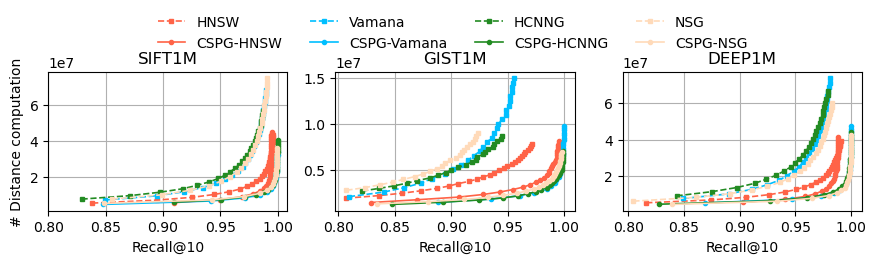

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=num_datasets, figsize=(14 / 4 * 3, 1.8))
axes[0].set_ylabel('# Distance computation') 
for i in range(num_datasets):
  ds = datasets[i]
  # plt.subplots_adjust(wspace=0.2)
  for k in range(num_indices):
    ind = indices[k]
    bsl = pd.read_csv(output+files[DatasetIndice2Str(ds, ind)]['bsl'])
    rpg = pd.read_csv(output+files[DatasetIndice2Str(ds, ind)]['rpg'])
    bsl = bsl[bsl['recall'] > low_recall]
    rpg = rpg[rpg['recall'] > low_recall]
    # print(rpg['QPS'], bsl['QPS'])
    axes[i].plot(bsl['recall'], bsl['comparison'], marker='s', color=colors[k], linewidth=1.2, linestyle='dashed', markersize=3)
    axes[i].plot(rpg['recall'], rpg['comparison'], marker='o', color=colors[k], linewidth=1.2, markersize=3)
  axes[i].set_xlabel(f'Recall@{knn}')
  axes[i].set_xticks(np.arange(low_recall, 1.001, gap_recall))
  axes[i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
  axes[i].grid(True)
  axes[i].set_title(f'{ds.upper()}')

fig.subplots_adjust(wspace=0.2)
fig.legend(leg, loc='center', bbox_to_anchor=(0.51, 1.1), ncol=num_indices, frameon=False)
fig.savefig(figures+f'comparison-recall.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
fig.savefig(figures+f'comparison-recall.png', dpi=300, bbox_inches='tight', pad_inches=0)
fig.savefig(figures+f'comparison-recall.svg', dpi=300, bbox_inches='tight', pad_inches=0)
fig.show()